In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Added all Libraries
from spectral import *
import numpy as np
import PIL
import matplotlib
import matplotlib.pyplot as plt
import mpmath as mp

Reading Hyperspectral Image. For this example Hawaii

In [3]:
#image stored in arr
img = open_image('f080611t01p00r06rdn_c_sc01_ort_img.hdr')
print img
arr = img.load()

	Data Source:   '././f080611t01p00r06rdn_c_sc01_ort_img'
	# Rows:           2776
	# Samples:         754
	# Bands:           224
	Interleave:        BIP
	Quantization:  16 bits
	Data format:     int16


ImageView object:
  Display bands       :  (50, 20, 10)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-50.0, 10468.0]
    G: [-50.0, 9558.0]
    B: [-50.0, 9972.0]

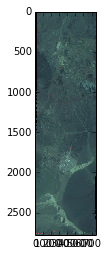

In [4]:
imshow(arr, (50,20,10))

In [5]:
##### considering 10x10 matrix
block = []
for i in range(224):
    data = arr[1810:1820,310:320,i].astype(np.float32)
    block.append(data)
print "process complete"

process complete


In [6]:
varblock = []
for hg in range(224):
    yog = np.var(block[hg])
    varblock.append(yog)
variance = np.average(varblock)

In [7]:
variance

105856.73

In [8]:
##### considering 40x40 matrix
block = []
for i in range(224):
    data = arr[1810:1850,310:350,i].astype(np.float32)
    block.append(data)
print "process complete"

process complete


In [9]:
#correlation
corr = []
for i in range(223):
    cor = np.corrcoef(block[i].reshape(-1), block[i+1].reshape(-1))[0][1]
    corr.append(cor)
print "process complete"

process complete


In [10]:
#Pre-Processing of the hyperspectral image, Hawaii. Using GOA technique
haha = corr.index(min(corr))
print haha

108


In [11]:
#greedy ordering algorithm
rblock = [] #reference block
block1 = [] #all blocks
block1 = block
rindex = [] #contains all index
ifin = []
ifin1 = []


rindex.append(haha)
rblock.append(block1[haha])

for gh in range(len(block)):
        ifin.append(gh) #ifin will conatin the number od indices
        
for jk in range(224): 
    corgoa = [] #conatins correlation of greedy ordering algorithm
    Ref = rindex[jk] #Ref will contain the last rindex    
    block1.pop(Ref) #Removes that index from the block
    yoyo = ifin.pop(Ref) # saves it to a temp variable yoyo
    ifin1.append(yoyo) #ifin1 will conatin the final rearranged indexes
    for ijk in range(len(block1)):
        corr2 = np.corrcoef(rblock[jk].reshape(-1), block1[ijk].reshape(-1))[0][1] #calculate correlation coefficient with respect to the reference block
        corgoa.append(corr2)
    if len(corgoa) !=0:
        indexi = corgoa.index(max(corgoa)) #indexi will contain the index of maximum correlation w.r.t to the rblock
        rblock.append(block1[indexi]) #add the corresponding block to the rblock
        rindex.append(indexi) 
    del(corgoa)
    del(Ref)
print "Process Complete"

Process Complete


In [12]:
corrfin = []
for i in range(223):
    corfin = np.corrcoef(rblock[i].reshape(-1), rblock[i+1].reshape(-1))[0][1]
    corrfin.append(corfin)
print "process complete"

process complete


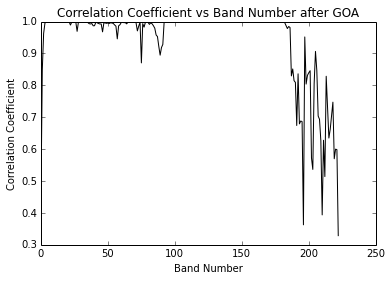

In [13]:
plt.figure(12)
plt.plot(range(0,223),corrfin, 'k')
plt.xlabel('Band Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs Band Number after GOA')
plt.show()

In [14]:
len(rblock[0])

40

In [15]:
#normalizing each block
rblockn = []
maxblock = []
minblock = []
for q in range(len(rblock)):
    xc = rblock[q]
    maxxc = np.max(xc)
    maxblock.append(maxxc)
    minxc = np.min(xc)
    minblock.append(minxc)
    xcfin = []
    for xci in range(len(xc)):
        for xcj in range(len(xc)):
            xcres = (xc[xci][xcj] - minxc)/(maxxc - minxc) 
            xcfin.append(xcres)
            print len(xcfin)
    xcfin1 = np.reshape(xcfin,(40,-1))
    rblockn.append(xcfin1)
print 'Process Complete'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [16]:
def raster(arr):
    a = arr
    xx = []
    for i in range(10):
        zz = []
        for j in range(10):
            x = float(a[i][j])
            zz.append(x)
        xx.extend(zz)
        del zz
    return xx

In [17]:
#imagescanning
finlist = []
for i in range(224):
    rblockyo = rblockn[i]
    xx = rblockyo[:10,:10]
    yy = raster(xx)
    finlist = finlist + yy

In [18]:
len(finlist)

22400

In [19]:
finlist = list(finlist)

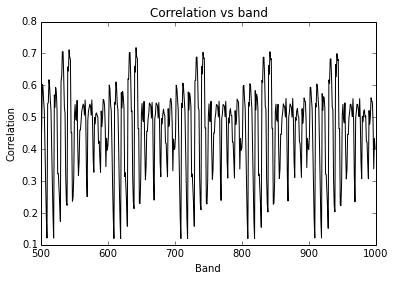

In [20]:
plt.figure(29)
plt.plot(range(500,1000),finlist[500:1000], 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [21]:
from audiolazy import lpc

In [22]:
y = 40 #frame size

In [23]:
finli = map (lambda x: finlist[y*x:(x+1)*y], range (len(finlist)/y)) 

In [24]:
reslpcfin = []
errorframe = []
coefficient = []
lpcfunction = []
lpcerror = []
errorfull = []
for ijk in range(len(finlist)/y):
    lpcframe = lpc(finli[ijk],order=3)
    lpcfunction.append(lpcframe)
    lpcerror.append(lpcframe.error)
    reslpc = list(lpcframe(finli[ijk]))
    reslpcfin.append(reslpc)
    coefficient.append(lpcframe.numerator)
    errorfr = []
    for ijkl in range(len(reslpc)):
        err = finli[ijk][ijkl] - reslpc[ijkl]
        errorfr.append(err)
        errorfull.append(err)
    errorframe.append(errorfr)
    del(errorfr)
    del(reslpc)
    del(lpcframe)
print "process complete"

process complete


In [25]:
#lpcjai1 = lpc(finlist, order=3).plot().show()

In [26]:
from sklearn import cluster

In [27]:
abcd = np.array(errorframe)

In [28]:
K_means = cluster.KMeans(n_clusters=128,max_iter=1,n_init =1, init='k-means++',tol = '1e-5')

In [29]:
fincodebook1 = K_means.fit(abcd)

In [30]:
codebook = K_means.cluster_centers_.squeeze()
huffcodebook = list(K_means.labels_)

In [31]:
dist = K_means.inertia_
print dist

12.0179868981


In [32]:
#print codebook
#print huffcodebook

In [33]:
from heapq import heappush, heappop, heapify
from collections import defaultdict
 
def encode(symb2freq):
    """Huffman encode the given dict mapping symbols to weights"""
    heap = [[wt, [sym, ""]] for sym, wt in symb2freq.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heappop(heap)[1:], key=lambda p: (len(p[-1]), p))
 
txt = "this is an example for huffman encoding"
symb2freq = defaultdict(int)
for ch in huffcodebook:
    symb2freq[ch] += 1
# in Python 3.1+:
# symb2freq = collections.Counter(txt)
huff = encode(symb2freq)
print "Symbol\tWeight\tHuffman Code"
huffsymbol = []
hufffreq = []
for p in huff:
    huffsymbol.append(p[1])
    hufffreq.append(symb2freq[p[0]])
    #print "%s\t%s\t%s" % (p[0], symb2freq[p[0]], p[1])

Symbol	Weight	Huffman Code


In [34]:
lenhuff = []
for i in range(len(huffsymbol)):
    yo = huffsymbol[i]
    x = str(yo)
    ya = x.lstrip('0')
    lenhuff.append(len(ya)*hufffreq[i])
print sum(lenhuff)

3234


In [35]:
len(lenhuff)

128

In [36]:
cr = float(len(finlist)*16)/sum(lenhuff)
print cr

110.822510823


In [37]:
def huffall(y):
    finli = map (lambda x: finlist[y*x:(x+1)*y], range (len(finlist)/y)) 
    print len(finli)
    global huffcode, lenhuff
    huffcode = []
    lenhuff = []
    for sym in finli:
        frequency = defaultdict(int)
        for symbol in sym:
            frequency[symbol] += 1

        huff = encode(frequency)
        #print "Symbol".ljust(10) + "Weight".ljust(10) + "Huffman Code"
        repeat = frequency.values()

        for i in range(len(huff)):
            p = huff[i]
            j = repeat[i]
            for k in range(j):
                x = str(p[1])
                ya = x.lstrip('0')
                lenyz = len(ya)
                #print  p[0] , str(frequency[p[0]]).ljust(10) , ya
                lenhuff.append(lenyz)
                huffcode.append(p[1])
        del frequency
    print 'process complete'
    print "The length of Huffcode", len(huffcode)
    cr = float(len(finlist)*16)/sum(lenhuff)
    print "The compression ratio for frame size", y, "is", cr

In [38]:
#BPP
bpp = sum(lenhuff)/22400.00
print bpp

0.144375


In [39]:
#huffcodebook - vector de-quantization
errordecode = []
for ik in huffcodebook:
    abcde = list(codebook[ik])
    errordecode.append(abcde)

In [40]:
len(errordecode)

560

In [41]:
print coefficient[0]
print "---"
print lpcerror[0]
print "---"
print lpcfunction[0] #h
print "---"
print finli[0] #x
print "---"
print reslpcfin[0] #y
print "---"
print errordecode[0] #e


[1, -0.999917717348545, -0.033297069040678196, 0.05945918895432811]
---
0.534020496786
---
1 - 0.999918 * z^-1 - 0.0332971 * z^-2 + 0.0594592 * z^-3
---
[0.5265957713127136, 0.5372340679168701, 0.5531914830207825, 0.563829779624939, 0.5478723645210266, 0.5531914830207825, 0.5106382966041565, 0.49468085169792175, 0.478723406791687, 0.4680851101875305, 0.5585106611251831, 0.5585106611251831, 0.5691489577293396, 0.563829779624939, 0.5478723645210266, 0.5531914830207825, 0.5106382966041565, 0.49468085169792175, 0.478723406791687, 0.4680851101875305, 0.5585106611251831, 0.5585106611251831, 0.5691489577293396, 0.5531914830207825, 0.5585106611251831, 0.5053191781044006, 0.5106382966041565, 0.5053191781044006, 0.4893617033958435, 0.4680851101875305, 0.5585106611251831, 0.5691489577293396, 0.563829779624939, 0.563829779624939, 0.5531914830207825, 0.5372340679168701, 0.5265957713127136, 0.5159574747085571, 0.48404255509376526, 0.478723406791687]
---
[0.5265957713127136, 0.01068162630022551, -0.0

In [42]:
from scipy.signal import lfilter

In [43]:
estx = []

In [44]:
estx.append(reslpcfin[0][0]+errordecode[0][0])

In [45]:
estx

[0.52659577131271362]

In [46]:
esty = list(lpcfunction[0](estx))

In [47]:
esty

[0.52659577131271362]

In [48]:
len(lpcfunction)

560

In [49]:
estx = []
esty = []
for iq in range(len(errordecode)):
    estx1 = []
    esty1 = []
    for iw in range(len(errordecode[iq])):
        estx1.append(reslpcfin[iq][iw]+errordecode[iq][iw])
        esty1 = list(lpcfunction[iq](estx1))
    esty.append(esty1)
    estx.append(estx1)

In [50]:
print estx[0]
print finli[0]

[0.52659577131271362, 0.53842275809978202, 0.57034251872596708, 0.59350372404226492, 0.57553978252678939, 0.594857623792443, 0.49926112079890683, 0.50750761350049822, 0.53012860095576797, 0.47455686655448498, 0.57881629864737727, 0.53320539472543871, 0.61316907010233646, 0.5640280082380289, 0.57086307472173581, 0.57311477255737731, 0.51107255265793305, 0.50831764515520339, 0.51700558059066215, 0.45651571057327378, 0.57815750526587117, 0.5262741083721304, 0.57730862670751681, 0.56812571467924688, 0.54215133894003564, 0.48893150263375929, 0.51925598007631601, 0.47364461882392139, 0.49301258217973359, 0.45763833470540016, 0.58061383418206935, 0.55330945577442936, 0.55035771570237146, 0.5737836064400581, 0.56658774147880597, 0.52509603058516396, 0.52619387119319594, 0.49449492579111848, 0.44335570309727024, 0.47082397035075718]
[0.5265957713127136, 0.5372340679168701, 0.5531914830207825, 0.563829779624939, 0.5478723645210266, 0.5531914830207825, 0.5106382966041565, 0.49468085169792175, 0.4

In [51]:
print esty[0]
print reslpcfin[0]

[0.52659577131271362, 0.011870316483137411, 0.014429967724140135, 0.036591192330202013, -0.0048916601673979071, 0.033515367318966642, -0.079422094332837201, 0.022701686541325324, 0.041408566372513514, -0.042740968740914667, 0.11682274235032071, -0.029843613477539159, 0.088951429070382768, -0.032428837857652, 0.018168703659075577, 0.019976726031744694, -0.047466481791084481, 0.0121471581785806, 0.025789482642183937, -0.046984857675130012, 0.13468874241622011, -0.03629572718786668, 0.05897092509052218, 0.0077179814861312174, -0.01385848239912385, -0.037765845081987368, 0.046092951678466582, -0.029612742589313554, 0.031188704473093978, -0.020230119230823573, 0.13475980607311455, -0.013180490907840781, 0.0049718529900202556, 0.039570420155851889, 0.0074253800992549399, -0.027826579499901326, 0.01639204363002315, -0.015450959979029087, -0.037397463896645035, 0.0423265768656019]
[0.5265957713127136, 0.01068162630022551, -0.0015324756067120367, 0.024106452284463935, -0.0023871747408458696, 0.

In [52]:
estxfin = []
for yi in estx:
    for yu in yi:
        estxfin.append(yu)

In [53]:
y = 100
estxfin1 = map (lambda x: estxfin[y*x:(x+1)*y], range (len(finlist)/y)) 

In [54]:
blockfin = []
for iji in estxfin1:
    bloc = np.reshape(iji,[10, 10])
    blockfin.append(bloc)

In [55]:
len(maxblock)

224

In [56]:
finblockfin = []
for i in range(len(blockfin)):
    eega = blockfin[i]
    eegamax = np.max(eega)
    eegamin = np.min(eega)
    oldmax = maxblock[i]
    oldmin = minblock[i]
    eegvalue = []
    for j in range(len(eega)):
        for k in range(len(eega)):
            ee = ((eega[j][k] - eegamin)*(oldmax - oldmin))/(eegamax - eegamin)
            eee = ee  + oldmin
            eegvalue.append(eee)
    fblock = np.reshape(eegvalue, [10,10])
    finblockfin.append(fblock)
print "Process Complete"

Process Complete


In [57]:
finblockfin[0]

array([[  42.28149664,   55.35783185,   90.64944898,  116.25729735,
          96.39572779,  117.75421684,   12.05933954,   21.17695375,
          46.18751814,  -15.25455835],
       [ 100.01835998,   49.58933023,  138.        ,   83.66790268,
          91.22499411,   93.71455093,   25.11847666,   22.07255342,
          31.67824234,  -35.20149896],
       [  99.2899747 ,   41.92585471,   98.35142452,   88.19847196,
          59.48028279,    0.63854809,   34.16636366,  -16.26317172,
           5.15073408,  -33.96028598],
       [ 102.00577889,   71.8170917 ,   68.5535434 ,   94.45403735,
          86.49803435,   40.62333021,   41.83714165,    6.78966564,
         -49.75166901,  -19.38178051],
       [  89.32980569,   57.28404659,   94.81981728,  107.54271631,
          86.29685096,   77.58130656,   59.33150567,    5.44050159,
          66.79609597,    9.68907998],
       [  58.96895324,   34.20112767,  117.57782809,  113.84534488,
         104.62781313,   51.21501597,   71.02450261,   41

In [58]:
rblock5 = []
for i in range(len(rblock)):
    a = rblock[i]
    ab = a[:10,:10]
    rblock5.append(ab)

In [59]:
psnr = []
mse = []
for i in range(224):
    aq = rblock5[i]
    aw = finblockfin[i]
    subtr = []
    for j in range(10):
        for k in range(10):
            sub = (aq[j][k] - aw[j][k])**2
            subtr.append(sub)
    mse1 = np.sum(subtr)/100.0
    mse.append(mse1)
    psnr1 = 10*np.log10(65536**2/mse1)
    psnr.append(psnr1)
print "process complete"

process complete


In [60]:
for i in range(20):
    a = psnr.index(inf)
    psnr[a] = 104

ValueError: inf is not in list

In [61]:
psnr1 = np.sum(psnr)/224.0

In [62]:
sdr = 10*np.log10(variance**2/dist)

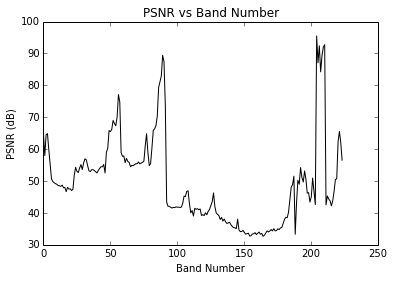

In [63]:
plt.figure(80)
plt.plot(range(224),psnr, 'k')
plt.xlabel('Band Number')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs Band Number')
plt.show()

In [64]:
print 'cr = ', cr
print 'bpp= ', bpp
print 'sdr= ', sdr
print 'psnr= ', psnr1
print 'dist= ',dist

cr =  110.822510823
bpp=  0.144375
sdr=  89.6960525799
psnr=  49.5263473035
dist=  12.0179868981
